In [45]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.utils.data.dataloader as Data
import torch.nn as nn
from torchvision import models
import numpy as np
import cv2
import matplotlib.pyplot as plt
import foolbox

In [46]:
#对比展现原始图片和对抗样本图片
def show_images_diff(original_img,original_label,adversarial_img,adversarial_label):
    plt.figure()
    #归一化
    if original_img.any() > 1.0:
        original_img=original_img/255.0
    if adversarial_img.any() > 1.0:
        adversarial_img=adversarial_img/255.0

    plt.subplot(131)
    plt.title('Original')
    plt.imshow(original_img)
    plt.axis('off')

    plt.subplot(132)
    plt.title('Adversarial')
    plt.imshow(adversarial_img)
    plt.axis('off')

    plt.subplot(133)
    plt.title('Adversarial-Original')
    difference = adversarial_img - original_img
    #(-1,1)  -> (0,1)
    difference=difference / abs(difference).max()/2.0+0.5
    plt.imshow(difference,cmap=plt.cm.gray)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

(224, 224, 3)
label=388
torch.Size([1, 3, 224, 224])


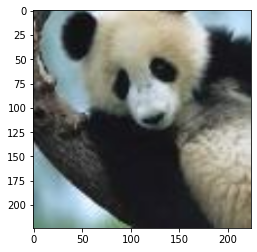

In [54]:
#获取计算设备 默认是CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#图像加载以及预处理
orig = cv2.imread('cropped_panda.jpg')[..., ::-1]

orig = cv2.resize(orig, (224, 224))

print(orig.shape)
img = orig.copy().astype(np.float32)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img /= 255.0
img = (img - mean) / std
img = img.transpose(2, 0, 1)

img=np.expand_dims(img, axis=0)
img = torch.from_numpy(img).to(device).float()
# print(img)
#使用预测模式 主要影响droupout和BN层的行为
model = models.alexnet(pretrained=True).to(device).eval()
label=np.argmax(model(img).data.cpu().numpy())
print("label={}".format(label))
print(img.shape)
plt.imshow(orig)

In [48]:
fmodel = foolbox.models.PyTorchModel(model,bounds=(0,255))

In [61]:
image,label_x = foolbox.utils.samples(fmodel)
image_ex = image[0]/255
image_ex = (image_ex-mean)/std
image_ex = np.expand_dims(image_ex,axis=0)
print(image_ex)


TypeError: unsupported operand type(s) for -: 'Tensor' and 'list'

In [ ]:
attack = foolbox.attacks.VirtualAdversarialAttack(fmodel)
adversarial_label=np.argmax(fmodel(image).data.cpu().numpy())
print("Adversarial label={}，Original"
      "label={}".format(adversarial_label,label))

In [52]:
adv=image.data.cpu().numpy()[0]
adv.shape

(3, 224, 224)